Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


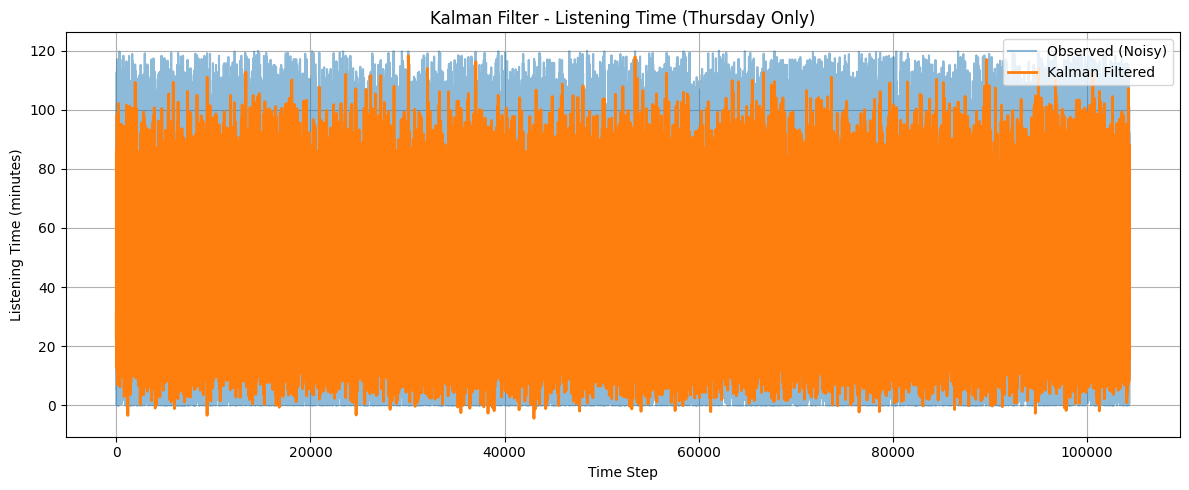

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Lọc dữ liệu: chỉ lấy các tập phát hành vào thứ Năm
thursday_df = train_df[train_df['Publication_Day'] == 'Thursday'].copy()

# Lấy chuỗi thời gian Listening_Time_minutes
listening_series = thursday_df['Listening_Time_minutes'].values

# Khởi tạo Kalman Filter
dt = 1.0  # bước thời gian
A = np.array([[1, dt], [0, 1]])     # ma trận chuyển trạng thái
H = np.array([[1, 0]])              # chỉ đo được vị trí
Q = np.array([[1, 0], [0, 1]])      # nhiễu trạng thái
R = np.array([[10]])               # nhiễu quan sát

# Trạng thái ban đầu: [vị trí, tốc độ]
x = np.array([[listening_series[0]], [0]])  # bắt đầu tại điểm đầu tiên
P = np.eye(2) * 1000                        # ma trận hiệp phương sai ban đầu

# Áp dụng Kalman Filter
filtered = []

for z in listening_series:
    z = np.array([[z]])

    # Dự đoán
    x_pred = A @ x
    P_pred = A @ P @ A.T + Q

    # Cập nhật
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x = x_pred + K @ (z - H @ x_pred)
    P = (np.eye(2) - K @ H) @ P_pred

    filtered.append(x[0, 0])  # lưu giá trị vị trí đã lọc

# Vẽ kết quả
plt.figure(figsize=(12, 5))
plt.plot(listening_series, label="Observed (Noisy)", alpha=0.5)
plt.plot(filtered, label="Kalman Filtered", linewidth=2)
plt.title("Kalman Filter - Listening Time (Thursday Only)")
plt.xlabel("Time Step")
plt.ylabel("Listening Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()